Text(0.5, 1.0, 'Hour 1 Channel FP1F7')

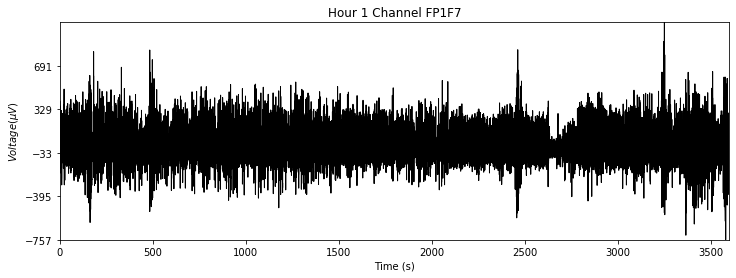

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# patient 24 hour 1 channel 1 data
hour1FP1F7 = []
with open('chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_01.txt') as hour1:
    next(hour1)
    for line in hour1:
        hour1FP1F7.append(float(line.strip().split('\t')[4]))
hour1FP1F7 = np.array(hour1FP1F7)
voltagemin = min(hour1FP1F7)
voltagemax = max(hour1FP1F7)
stepsize = (voltagemax-voltagemin)/5
# print(voltagemin, voltagemax, stepsize,hour1FP1F7)
# time vector
time = np.arange(hour1FP1F7.size)/256
# visualize data
fig, ax = plt.subplots(1, 1, figsize=(12,4))
plt.plot(time, hour1FP1F7, lw=1, color='k')
plt.xlim([time.min(), time.max()])
plt.ylim([voltagemin, voltagemax])
plt.yticks(np.arange(voltagemin, voltagemax, step=stepsize))
plt.xlabel('Time (s)')
plt.ylabel(r'$Voltage (\mu V)$')
plt.title('Hour 1 Channel FP1F7')
# sns.despine()


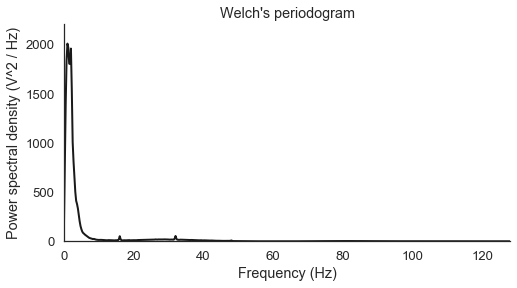

In [3]:
from scipy import signal
sf = 256
# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(hour1FP1F7, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()


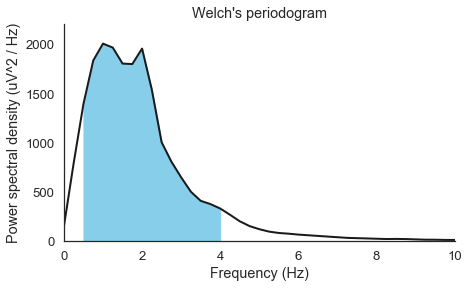

In [4]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [5]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

# Relative delta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Absolute delta power: 4396.911 uV^2
Relative delta power: 0.760


In [12]:
allhoursallchannels = {'FP1F3':[],'F3C3':[],'C3P3':[],'FP2F4':[],'F4C4':[],'C4P4':[]}
channels = ['FP1F3','F3C3','C3P3','FP2F4','F4C4','C4P4']
channelcolumn = [8,9,10,12,13,14]
datafiles = ['chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_01.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_02.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_03.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_04.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_05.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_06.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_07.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_08.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_09.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_10.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_11.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_12.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_13.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_14.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_15.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_16.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_17.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_18.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_19.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_20.txt',
            'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_21.txt',
             'chb-mit-scalp-eeg-database-1.0.0/chb-mit-scalp-eeg-database-1.0.0/chb24/chb24_22.txt']
for i in range(len(datafiles)):    
    with open(datafiles[i]) as hour:
        next(hour)
        for line in hour:
            for i in range(len(channels)):
                allhoursallchannels[channels[i]].append(float(line.strip().split('\t')[4+i]))

for i in range(len(channels)):
    print(allhoursallchannels[channels[i]][-10:])

[0.19536019536014, -17.7777777777778, -23.6385836385837, 6.83760683760678, 32.6251526251526, -13.0891330891331, 56.8498168498168, 147.106227106227, 85.3724053724053, 8.79120879120874]
[-82.2466422466423, -47.8632478632479, -77.948717948718, -75.6043956043956, -102.173382173382, -104.517704517705, -102.564102564103, -78.3394383394384, -63.1013431013432, -78.3394383394384]
[15.042735042735, 16.2148962148962, 12.3076923076923, 13.089133089133, -17.7777777777778, -31.4529914529915, -14.6520146520147, 50.9890109890109, 56.068376068376, 36.1416361416361]
[-27.1550671550672, -59.5848595848596, 61.9291819291819, 37.7045177045176, 77.9487179487179, 13.8705738705738, -22.0757020757021, -139.68253968254, -94.7496947496948, 55.6776556776556]
[-43.956043956044, -38.0952380952381, -44.7374847374848, -58.8034188034189, -21.6849816849817, -17.3870573870574, 83.028083028083, 97.094017094017, 50.5982905982905, 18.5592185592185]
[43.9560439560439, 82.2466422466422, 66.6178266178266, 109.59706959707, 38.4

In [24]:
# Segment & label data of preictal(P) & interictal(N) class
preS = []
preE = []
nonS = []
nonE = []
with open('preictal_intervals.txt') as table:
    next(table)
    for line in table:
        preS.append(float(line.strip().split('\t')[0]))
        preE.append(float(line.strip().split('\t')[1]))
        
with open('interictal_intervals.txt') as table:
    next(table)
    for line in table:
        nonS.append(float(line.strip().split('\t')[0]))
        nonE.append(float(line.strip().split('\t')[1]))

preTime = np.vstack((np.array(preS),np.array(preE)))
nonTime = np.vstack((np.array(nonS),np.array(nonE)))
pre_pos = preTime.astype(int) * 256
non_pos = nonTime.astype(int) * 256

In [25]:
# Find start & end index of each inverval for spectral power calculation
win = 20 # window size in sec
pre_win = np.floor_divide((preTime[1,:]-preTime[0,:]),win/2).astype(int) - 1 
non_win = np.floor_divide((nonTime[1,:]-nonTime[0,:]),win/2).astype(int) - 1
batch = int(pre_win[1])

# num overlapping windows for each interval
pre_size = int(np.sum(pre_win))
non_size = int(np.sum(non_win))
print('One batch of data in 11-fold cross validation has size:', batch)
print('Preictal total number of windows(samples)',pre_size)
print('Interictal total number of windows(samples):',non_size)

print('# 20s sliding windows in each batch')
print(pre_win)
print(non_win)

# Update ending position of each batch for indexing purpose
pre_pos[1,:] = pre_pos[0,:] + (pre_win + 1)*10*256
non_pos[1,:] = non_pos[0,:] + (non_win + 1)*10*256
print('\nPreictal data batch star&end postitions(index):\n', pre_pos)
print('Interictal start&end postitions(index): \n', non_pos)

One batch of data in 11-fold cross validation has size: 78
Preictal total number of windows(samples) 858
Interictal total number of windows(samples): 1515
# 20s sliding windows in each batch
[78 78 78 78 78 78 78 78 78 78 78]
[267 275  68  93 741  71]

Preictal data batch star&end postitions(index):
 [[  422656  1697536  2376448  3739648  4717824  7614720  9914112 11696128
  13606912 15440640 18945024]
 [  624896  1899776  2578688  3941888  4920064  7816960 10116352 11898368
  13809152 15642880 19147264]]
Interictal start&end postitions(index): 
 [[ 6466560  8745984 11058432 14737664 16583936 20088832]
 [ 7152640  9452544 11235072 14978304 18483456 20273152]]


In [27]:
# preictal in chb24_01
preictal1delta = {'FP1F3':[],'F3C3':[],'C3P3':[],'FP2F4':[],'F4C4':[],'C4P4':[]}

# for i in range(len(channels)):
#     for j in range(626656,627456,10):
#         freqs, psd = signal.welch(allhoursallchannels[channels[i]][j:j+sf*20], sf, nperseg=win)
#         idx_delta = np.logical_and(freqs >= low, freqs <= high)
#         freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25
#         delta_power = simps(psd[idx_delta], dx=freq_res)
#         total_power = simps(psd, dx=freq_res)
#         delta_rel_power = delta_power / total_power
#         preictal1delta[channels[i]].append(delta_rel_power)
        
# Calculate spectral power of each windows & save feature values

# Preictal class

for interval in range(len(pre_win)): # preictal has 11 intervals
    for win in range(pre_win[interval]): # each interval has 78 windows
        for i in range(len(channels)):
            start = pre_pos[0,interval]
            end = start + win * 20 * sf
            freqs, psd = signal.welch(allhoursallchannels[channels[i]][start:end], sf, nperseg=win)
            idx_delta = np.logical_and(freqs >= low, freqs <= high)
            freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25
            delta_power = simps(psd[idx_delta], dx=freq_res)
            total_power = simps(psd, dx=freq_res)
            delta_rel_power = delta_power / total_power
            preictal1delta[channels[i]].append(delta_rel_power)
    
        
# # Ictal class

# for i in range(len(channels)):
#     print(preictal1delta[channels[i]][:10])

IndexError: index 1 is out of bounds for axis 0 with size 0

In [29]:
# Randomly draw data & group for SVM cross validation
fold = 11
samples = np.arange(non_size)

non_dataID = np.random.choice(samples,size=pre_size,replace=False).reshape([11,batch])
pre_dataID = np.arange(pre_size).reshape([11,batch])

non_dataID

array([[1419, 1295,  615, 1413,  769,  149,  218,  402, 1056, 1499,  139,
         729, 1414,  112,  494, 1311,   17, 1394,  523,   94,  946, 1002,
         759,  325, 1280, 1021,  670,  814,  856,  803,  260, 1062,  888,
        1319,  379, 1225, 1106, 1189, 1373, 1378, 1354, 1219,  387, 1368,
        1218,  548, 1175,    6, 1048,  718,  217, 1444,  673, 1342,  127,
        1442, 1482, 1301, 1146,  185,  838, 1455, 1227, 1273,  502,  880,
         648, 1088,   10,  338,  627,  945, 1160,  904, 1043,  116,  102,
        1486],
       [ 877, 1268,  808, 1149,  644, 1289, 1233,  374,  716,  890,  191,
        1000,  723,  448, 1400,  280,  533,  794,  801,  355,  941,  512,
         917,  221,  962,  981,   98,  635,  839, 1165,  308, 1075,  284,
         625, 1195, 1159,  528,  351, 1331,  118,  330, 1472,  609, 1291,
         519, 1417,  467,  206,  509,  539,  419,  575, 1506,  205,  304,
        1364, 1303,  633,  472,   28,  259,  624,  702, 1100, 1466, 1228,
         238,  868, 108